# INSPER - Big Data e Computação em Nuvem
# Aula 1 - Introdução à Computação em Larga Escala, Dask

#### *Prof. Michel Fornaciali*
#### *Profa. Thanuci Silva*

Vantagens de se usar Dask:

1. **Fácil de usar**: É projetado para usar interfaces familiares como Numpy, Pandas e Scikit-Learn, permitindo que os usuários escalem suas operações sem a necessidade de aprender um novo framework completamente.

2. **Proporciona escalabilidade**: Permite a execução tarefas em grande escala, dividindo-os em tarefas menores e gerenciáveis, que são então executadas em paralelo em vários núcleos ou distribuídas entre várias máquinas.

[Link para a documentação](https://docs.dask.org/en/latest/)

### Instalação da biblioteca Dask

`!pip install dask[complete]`

In [1]:
!pip install dask[complete]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00


### Instalação da biblioteca Graphviz

Para visualizar o grafos de execução do Dask, é necessário a biblioteca Graphivz.

No Google Colab, Graphviz já vem instalado por padrão. Caso contrário, utilize: `!pip install graphviz`

### Importando bibliotecas

In [14]:
import pandas as pd
import numpy as np
from dask import delayed
from time import sleep

Vamos iniciar fazendo duas funcões: inc e add, que irão levar pelo menos 1 segundo em sua execução, com uso da função sleep

In [3]:
def inc(x):
  sleep(1)
  return x+1

def add(x, y):
  sleep(1)
  return x+y

Agora vamos ver o tempo de execução. Para isso use o magic command %%time

In [6]:
%%time
data = list( range(1,9))
results = []
for x in data:
  y = inc(x)
  results.append(y)
total = sum(results)
print(total)

44
CPU times: user 31.8 ms, sys: 5.36 ms, total: 37.1 ms
Wall time: 8.01 s


Delayed('sum-905e3192-f2bd-4a06-a182-35b8aa042f51')
CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 2.91 ms


# Usando o Dask

Como esperado, os códigos demoraram três segundos, pois cada linha de execução levou em torno de 1 segundo para concluir, uma vez que fizemos uso da função sleep em suas definições.

De todo modo, é possível pensar em paralelizar?

Consegue pensar nas partes que podem ser paralizadas e na parte sequêncial?

De fato, poderíamos fazer em paralelo a atribuição de `x` e a atribuição de `y` e, na sequencia, somar `x` e `y`, armazenando em `z`. `z` é a parte sequencial e ela limita a nossa execução em paralelo.

A biblioteca **dask** possui mecanismos interessantes de paralelizar a execução de código, otimizando sempre que possível. Neste caso, vamos usar a função *delayed* da biblioteca para informar que queremos aplicar *lazy evaluation*

In [8]:
%%time
data = list( range(1,9))
results = []
for x in data:
  y = delayed(inc)(x)
  results.append(y)
total = delayed(sum)(results)
print(total)

Delayed('sum-9f63f2e0-a722-4c05-a700-3f11de515e79')
CPU times: user 390 µs, sys: 936 µs, total: 1.33 ms
Wall time: 1.2 ms


In [10]:
%%time
total.compute()

CPU times: user 295 ms, sys: 44.7 ms, total: 340 ms
Wall time: 4.48 s


44

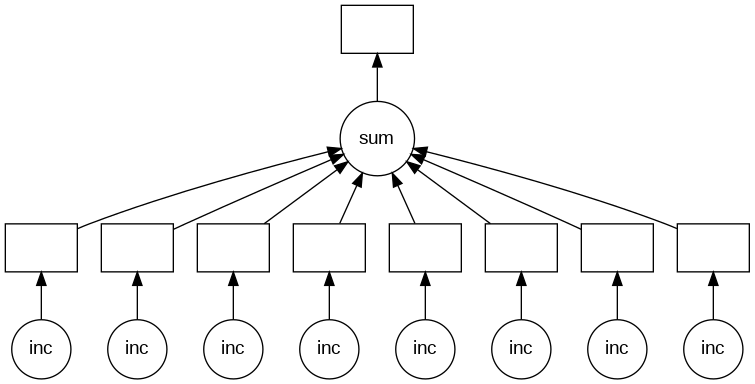

In [24]:
total.visualize()

A bilioteca nos permite visualizar um grafo da execução para este cenário.

Observe que há o paralelismo ao invocar a função *inc* simultaneamente e, posteriormente, há a invocação da função *add*.

Para executar esse grafo, faça uso da função *compute*

Excelente! Agora conseguimos executar em 2 segundos!

## E se fosse um laço?

Será que agora conseguimos fazer isso para um laço? Veja o código abaixo:

## E com o dask?

Levamos quase 8 segundos para incrementar cada elemento da lista e somá-los. Mas isso poderia ser paralelizado, concorda? Vamos modificar o código e aplicar a função *delayed*:

# Comparando com o Pandas - Voos NYC

In [11]:
!wget https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz
!mkdir data
!tar -xvzf nycflights.tar.gz -C data

--2024-10-19 17:37:26--  https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 172.253.115.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44120091 (42M) [application/x-gzip]
Saving to: ‘nycflights.tar.gz’

nycflights.tar.gz   100%[===================>]  42.08M  78.5MB/s    in 0.5s    

2024-10-19 17:37:27 (78.5 MB/s) - ‘nycflights.tar.gz’ saved [44120091/44120091]

nycflights/
nycflights/1990.csv
nycflights/1991.csv
nycflights/1992.csv
nycflights/1993.csv
nycflights/1994.csv
nycflights/1995.csv
nycflights/1996.csv
nycflights/1997.csv
nycflights/1998.csv
nycflights/1999.csv


In [12]:
import glob

filenames = glob.glob("data/nycflights/*.csv")

for f in filenames:
  print(f)

data/nycflights/1996.csv
data/nycflights/1999.csv
data/nycflights/1995.csv
data/nycflights/1997.csv
data/nycflights/1990.csv
data/nycflights/1992.csv
data/nycflights/1998.csv
data/nycflights/1994.csv
data/nycflights/1991.csv
data/nycflights/1993.csv


In [17]:
pd.read_csv(filenames[0])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1996,1,1,1,930.0,930,1304.0,1307,CO,1645,...,316.0,-3.0,0.0,EWR,PHX,2133,3,15,0,0
1,1996,1,2,2,946.0,930,1312.0,1307,CO,1645,...,290.0,5.0,16.0,EWR,PHX,2133,4,32,0,0
2,1996,1,3,3,1149.0,930,1544.0,1307,CO,1645,...,296.0,157.0,139.0,EWR,PHX,2133,6,53,0,0
3,1996,1,4,4,937.0,930,1329.0,1307,CO,1645,...,324.0,22.0,7.0,EWR,PHX,2133,5,23,0,0
4,1996,1,5,5,935.0,930,1344.0,1307,CO,1645,...,329.0,37.0,5.0,EWR,PHX,2133,6,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259509,1996,12,27,5,1655.0,1640,1908.0,1852,UA,1659,...,232.0,16.0,15.0,LGA,DEN,1619,9,12,0,0
259510,1996,12,28,6,1648.0,1640,1855.0,1850,UA,1659,...,227.0,5.0,8.0,LGA,DEN,1619,4,16,0,0
259511,1996,12,29,7,2008.0,1640,2236.0,1852,UA,1659,...,225.0,224.0,208.0,LGA,DEN,1619,8,35,0,0
259512,1996,12,30,1,1644.0,1640,1855.0,1852,UA,1659,...,235.0,3.0,4.0,LGA,DEN,1619,5,11,0,0


Vamos descobrir o maior atraso de todos os voos listados (DepDelay).

In [27]:
%%time
maxs = []
for f in filenames:
  df = pd.read_csv(f)
  maxs.append(df["DepDelay"].max())
final_max = max(maxs)
final_max

CPU times: user 4.14 s, sys: 110 ms, total: 4.25 s
Wall time: 4.25 s


1435.0

Usando delayed() do dask para obter a mesma informação.

In [28]:
%%time
maxs = []
for f in filenames:
  df = delayed(pd.read_csv)(f)
  maxs.append(df["DepDelay"].max())
final_max = delayed(max)(maxs)
final_max

CPU times: user 3.03 ms, sys: 1 ms, total: 4.04 ms
Wall time: 3.71 ms


Delayed('max-e80fb209-ca21-40b3-afce-8563da6fbb0f')

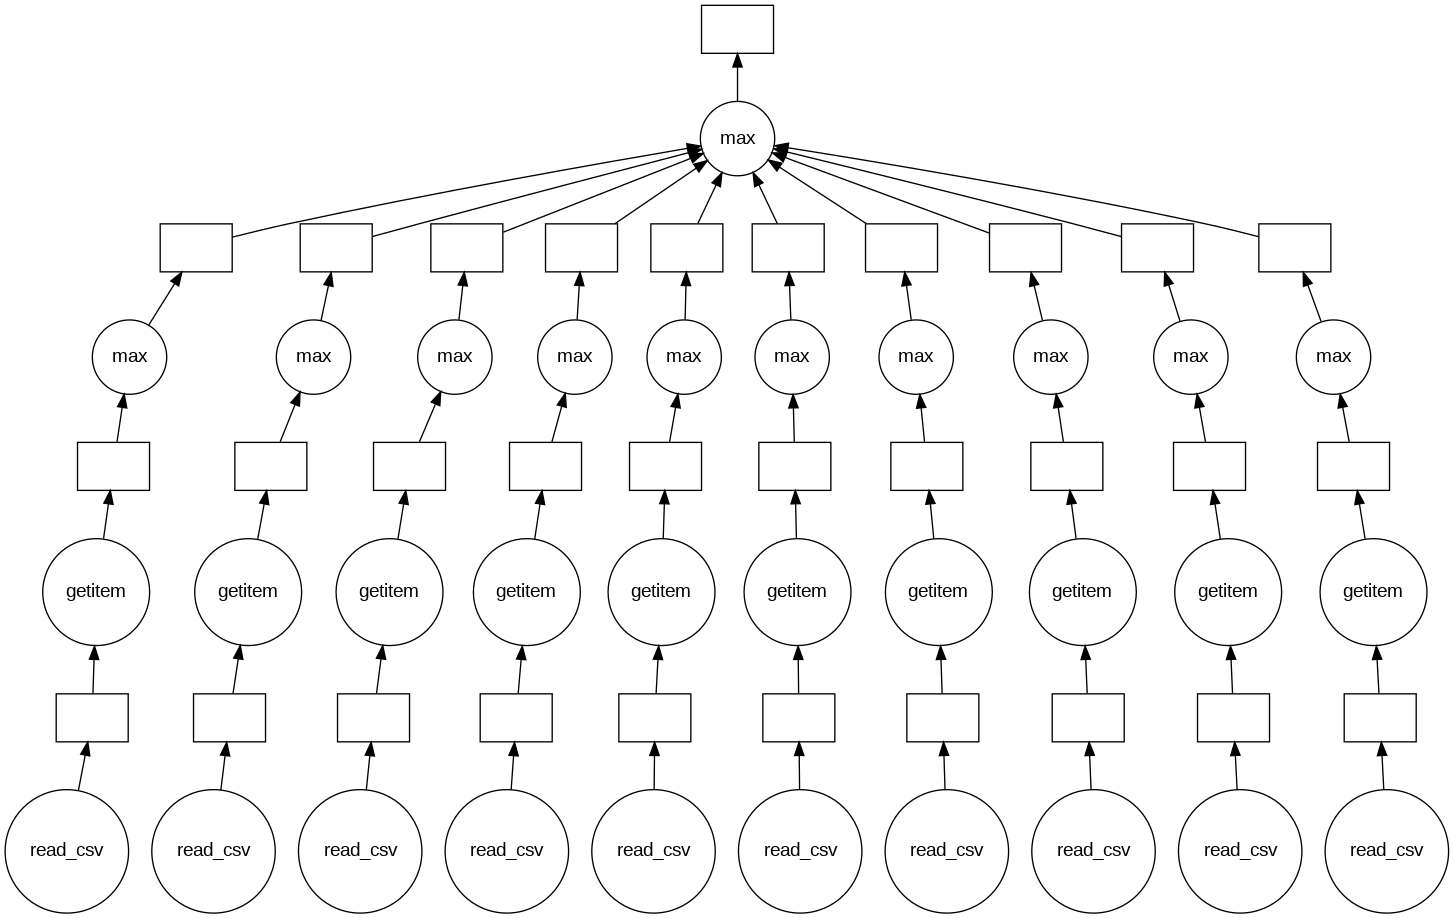

In [23]:
final_max.visualize()

In [29]:
%%time
final_max.compute()

CPU times: user 6.74 s, sys: 67.4 ms, total: 6.8 s
Wall time: 4.8 s


1435.0

# Usando dask puro para obter o valor máximo de atraso.

Vamos carregar nossos dados diretamente como Dask Dataframe (ddf)

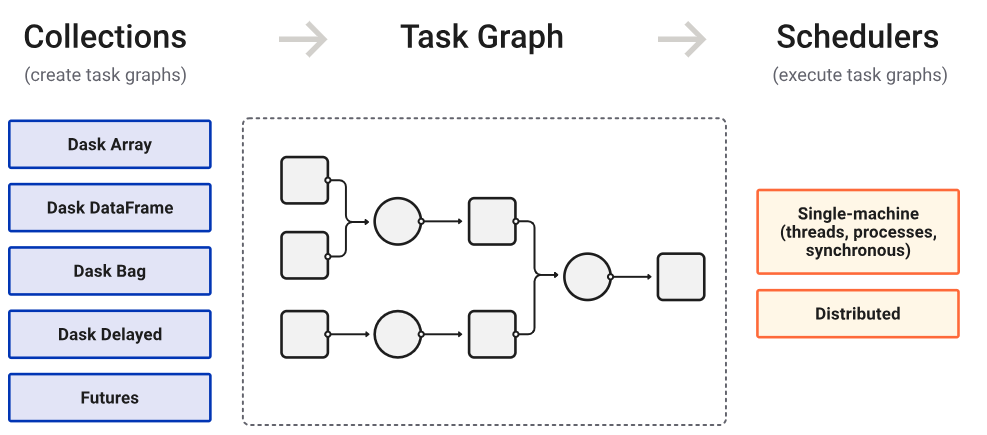

In [30]:
import dask.dataframe as ddf

In [31]:
%%time
df = ddf.read_csv("data/nycflights/*.csv", dtype={"TailNum": str,
                         "CSRElapsedTime": int,
                         "Cancelled": bool}, assume_missing=True)


CPU times: user 26.3 ms, sys: 3.08 ms, total: 29.3 ms
Wall time: 35.1 ms


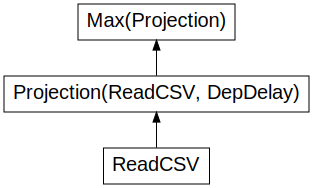

In [32]:
df.DepDelay.max().visualize()

## Obtendo voos não cancelados

Podemos compartilhar resultados intermediários. Ex: cálculo de média e desvio padrão de atrasos para voos não cancelados.

In [33]:
df = ddf.read_csv("data/nycflights/*.csv", dtype={"TailNum": str,
                         "CSRElapsedTime": int,
                         "Cancelled": bool}, assume_missing=True)

In [35]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999.0,12.0,27.0,1.0,1645.0,1645.0,1830.0,1901.0,UA,1753.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0.0
269177,1999.0,12.0,28.0,2.0,1726.0,1645.0,1928.0,1901.0,UA,1753.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0.0
269178,1999.0,12.0,29.0,3.0,1646.0,1645.0,1846.0,1901.0,UA,1753.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0.0
269179,1999.0,12.0,30.0,4.0,1651.0,1645.0,1908.0,1901.0,UA,1753.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0.0
269180,1999.0,12.0,31.0,5.0,1642.0,1645.0,1851.0,1901.0,UA,1753.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0.0


In [36]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990.0,1.0,1.0,1.0,1621.0,1540.0,1747.0,1701.0,US,33.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0.0
1,1990.0,1.0,2.0,2.0,1547.0,1540.0,1700.0,1701.0,US,33.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0.0
2,1990.0,1.0,3.0,3.0,1546.0,1540.0,1710.0,1701.0,US,33.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0.0
3,1990.0,1.0,4.0,4.0,1542.0,1540.0,1710.0,1701.0,US,33.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0.0
4,1990.0,1.0,5.0,5.0,1549.0,1540.0,1706.0,1701.0,US,33.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0.0


In [37]:
df.DepDelay.compute()

,DepDelay
0,41.0
1,7.0
2,6.0
3,2.0
4,9.0
...,...
269176,0.0
269177,41.0
269178,1.0
269179,6.0


In [39]:
df["DepDelay"].max().compute()

1435.0

In [42]:
non_cancelled = df[~df["Cancelled"]]
non_cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990.0,1.0,1.0,1.0,1621.0,1540.0,1747.0,1701.0,US,33.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0.0
1,1990.0,1.0,2.0,2.0,1547.0,1540.0,1700.0,1701.0,US,33.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0.0
2,1990.0,1.0,3.0,3.0,1546.0,1540.0,1710.0,1701.0,US,33.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0.0
3,1990.0,1.0,4.0,4.0,1542.0,1540.0,1710.0,1701.0,US,33.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0.0
4,1990.0,1.0,5.0,5.0,1549.0,1540.0,1706.0,1701.0,US,33.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0.0


In [45]:
mean_delay = non_cancelled["DepDelay"].mean()
mean_delay #promessa de execução #execution process #hahalibib alibaba
std_delay = non_cancelled["DepDelay"].std()

In [48]:
%%time
print(mean_delay.compute())
print(std_delay.compute())

9.206602541321965
28.974539774551456
CPU times: user 7.24 s, sys: 140 ms, total: 7.38 s
Wall time: 4.23 s


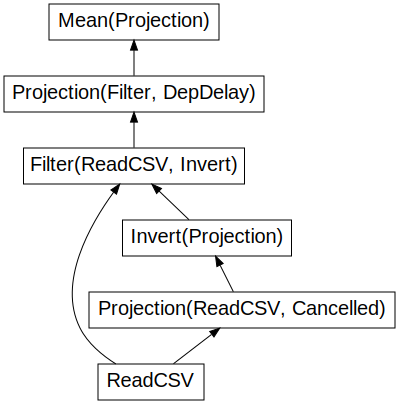

In [50]:
mean_delay.visualize()

NameError: name 'dask' is not defined

In [52]:
import dask

In [53]:
%%time
mean_delay_resp, std_delay_resp = dask.compute(mean_delay, std_delay)
print(mean_delay_resp)
print(std_delay_resp)

9.206602541321965
28.974539774551456
CPU times: user 8.74 s, sys: 850 ms, total: 9.59 s
Wall time: 6.96 s


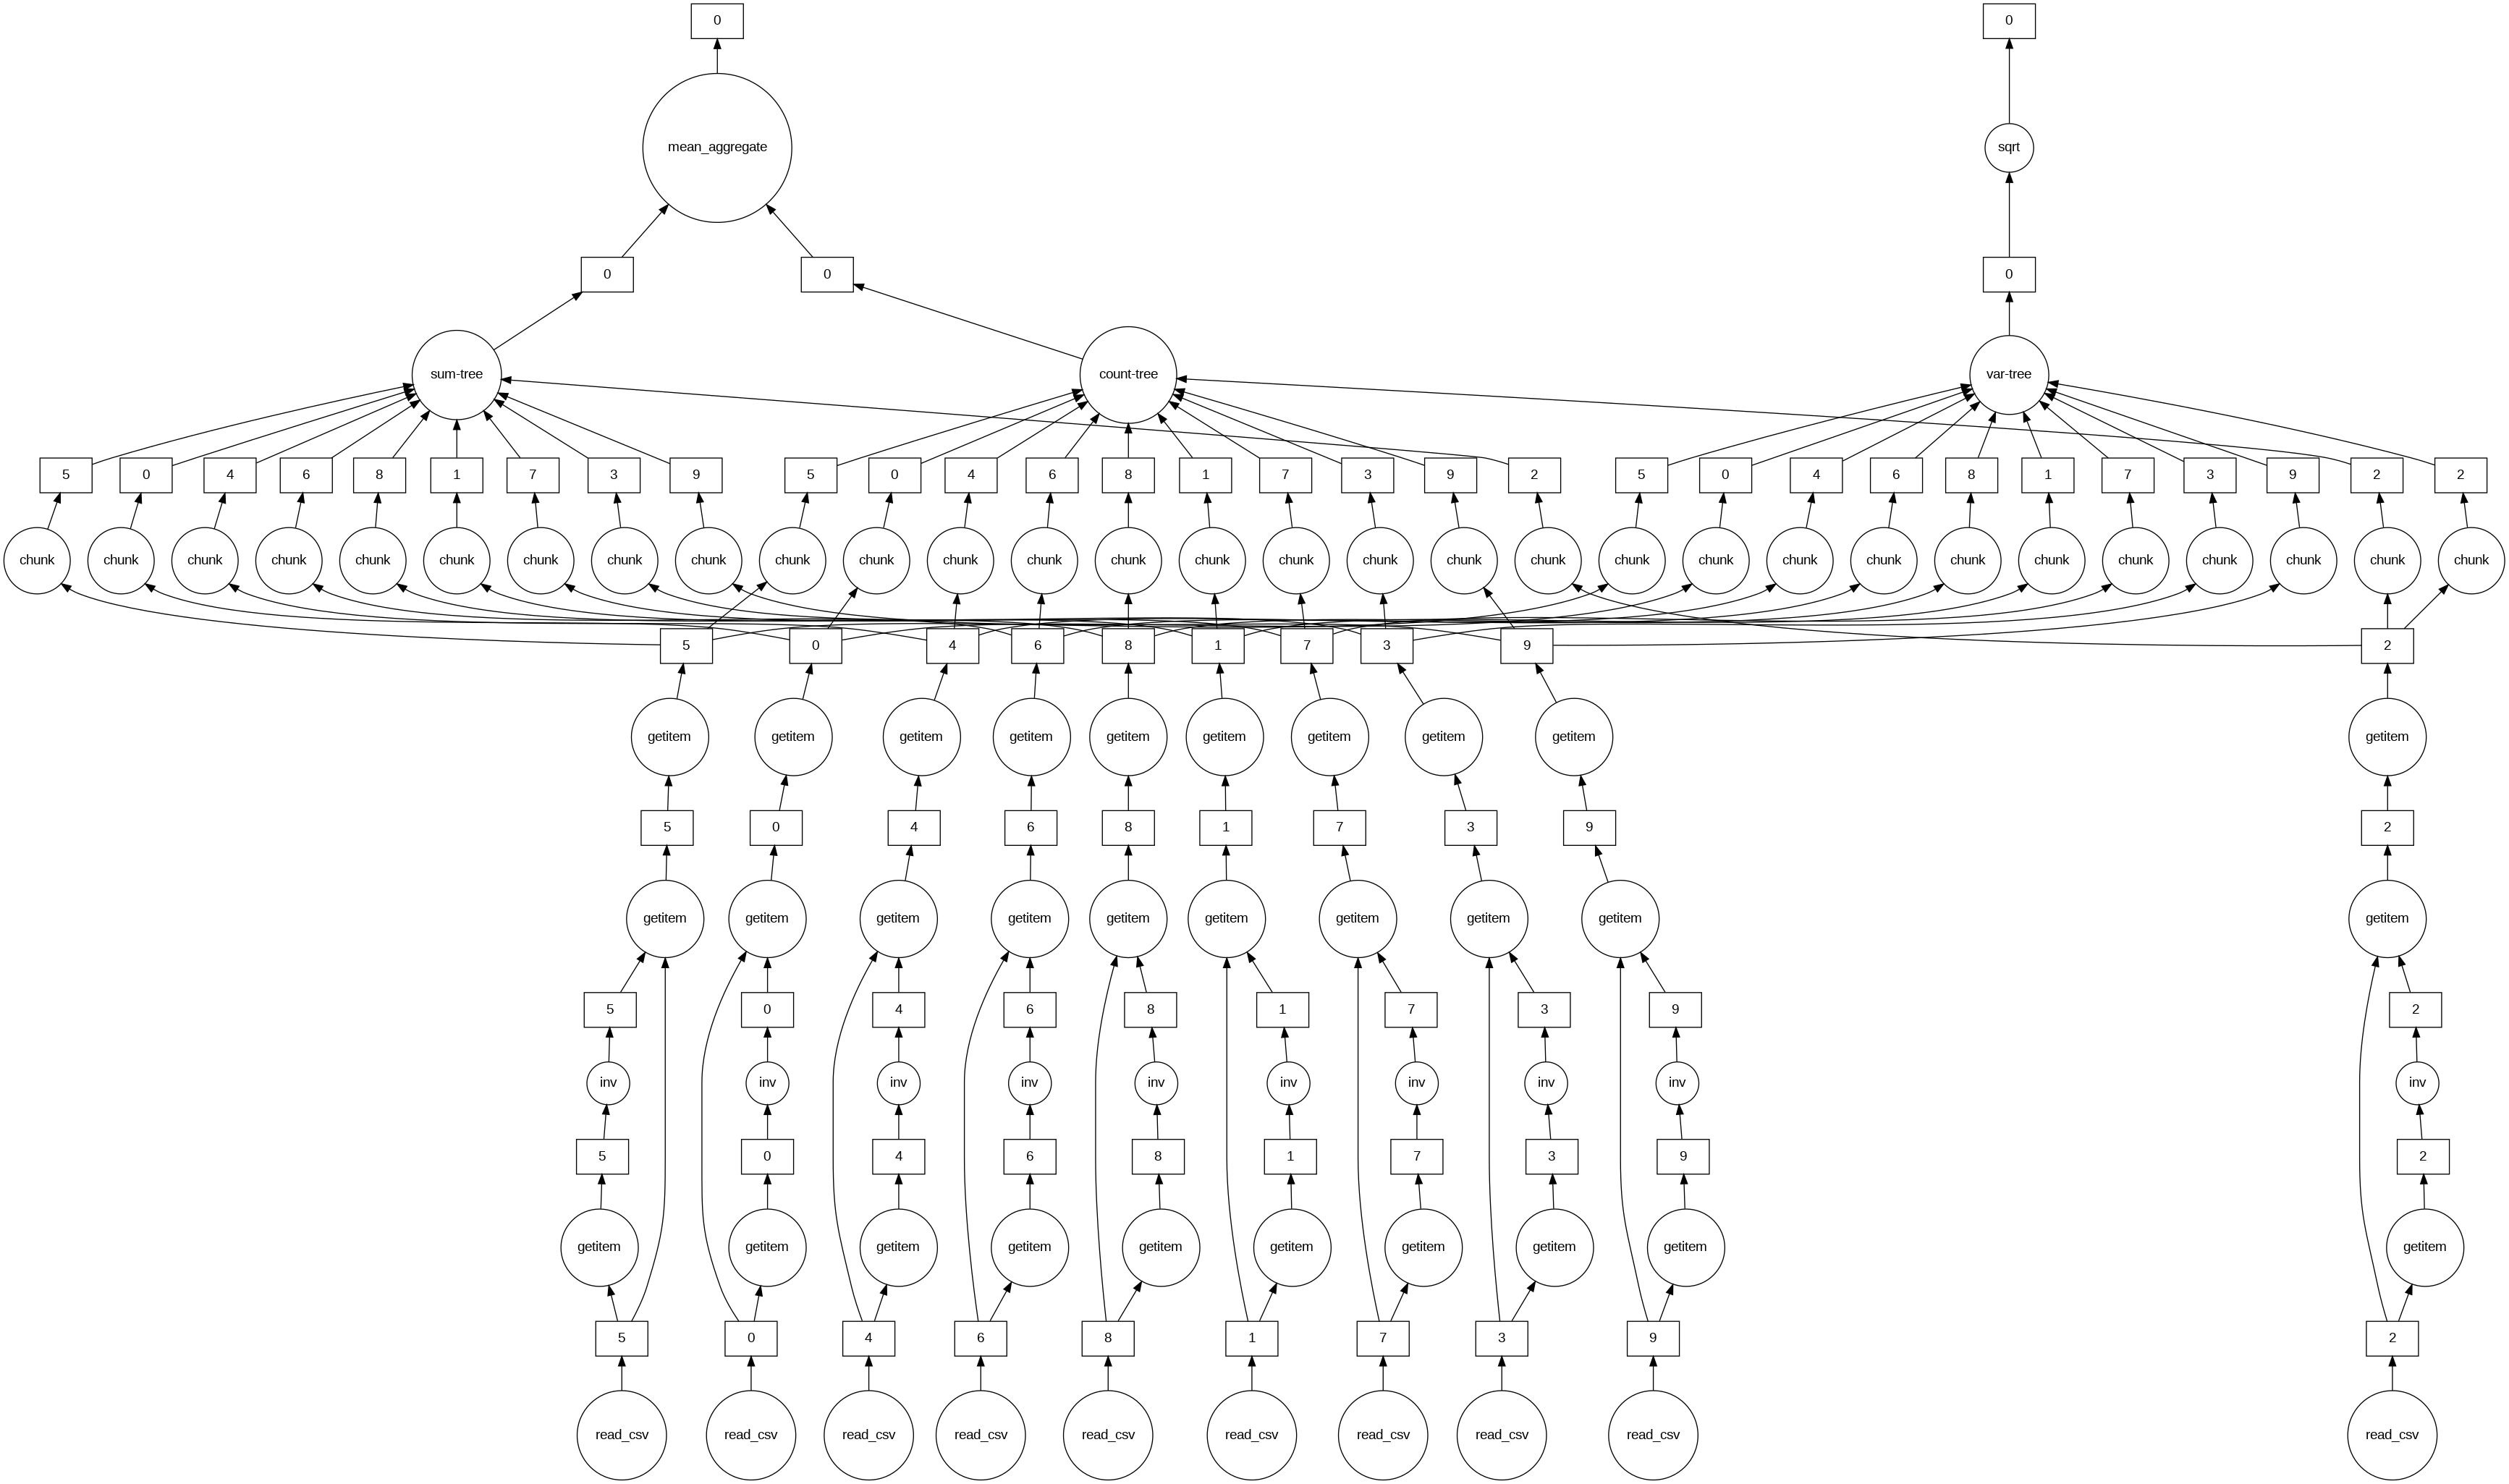

In [56]:
dask.visualize(mean_delay,std_delay)

Agora é com vocês!

Sabendo da interface existente entre Dask, Pandas, NumPy e ScikitLearn façam, a partir do Dataframe de vôos não cancelados:


1.   Uma filtragem de Dados: selecione voos que partiram de "JFK" e tiveram como destino "LAX".

2.   Agrupamento e Agregação: a partir dos dados filtrados na etapa 1, agrupe os dados por ano e mês do voo, e calcule o número total de vôos por mês.

3.   Plote um gráfico que seja interessante para mostrar distribuição do número de voos por ano e por mês. Ps.: Substitua os números dos meses por seus respectivos nomes.

4.   A partir da visualização gerada e no período de tempo considerado, qual o mês onde aparentemente o número de vôos é maior?

5. Faça um gráfico de barras com a contagem de número de voos (origem) por aeroporto. Qual aeroporto de NY tem maior número de departures?

6. Faça um gráfico de dispersão comparando a distância do vôo com o atraso no pouso. Observando esse gráfico, quais são as conclusões que podemos tirar a respeito de:
 - Qualidade da informação
 - Pipeline de execução








In [78]:
JFK2LAX = non_cancelled[(non_cancelled["Origin"] == "JFK") & (non_cancelled["Dest"] == "LAX")]

In [79]:
%%time
JFK2LAX.compute()

CPU times: user 8.5 s, sys: 731 ms, total: 9.23 s
Wall time: 6.44 s


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
5454,1990.0,1.0,1.0,1.0,1010.0,945.0,1310.0,1302.0,PA (1),81.0,...,NaN,8.0,25.0,JFK,LAX,2475.0,NaN,NaN,False,0.0
5455,1990.0,1.0,2.0,2.0,945.0,945.0,1240.0,1302.0,PA (1),81.0,...,NaN,-22.0,0.0,JFK,LAX,2475.0,NaN,NaN,False,0.0
5456,1990.0,1.0,3.0,3.0,950.0,945.0,1250.0,1302.0,PA (1),81.0,...,NaN,-12.0,5.0,JFK,LAX,2475.0,NaN,NaN,False,0.0
5457,1990.0,1.0,4.0,4.0,950.0,945.0,1247.0,1302.0,PA (1),81.0,...,NaN,-15.0,5.0,JFK,LAX,2475.0,NaN,NaN,False,0.0
5458,1990.0,1.0,5.0,5.0,945.0,945.0,1245.0,1302.0,PA (1),81.0,...,NaN,-17.0,0.0,JFK,LAX,2475.0,NaN,NaN,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263095,1999.0,12.0,26.0,7.0,1838.0,1845.0,2201.0,2158.0,UA,905.0,...,328.0,3.0,-7.0,JFK,LAX,2475.0,30.0,25.0,False,0.0
263096,1999.0,12.0,27.0,1.0,1850.0,1845.0,2130.0,2158.0,UA,905.0,...,301.0,-28.0,5.0,JFK,LAX,2475.0,6.0,33.0,False,0.0
263097,1999.0,12.0,28.0,2.0,1842.0,1845.0,2136.0,2158.0,UA,905.0,...,320.0,-22.0,-3.0,JFK,LAX,2475.0,7.0,27.0,False,0.0
263098,1999.0,12.0,29.0,3.0,1839.0,1845.0,2147.0,2158.0,UA,905.0,...,329.0,-11.0,-6.0,JFK,LAX,2475.0,12.0,27.0,False,0.0


In [84]:
# prompt: group non_cancelled by month and by year

%%time
non_cancelled_by_month_year = non_cancelled.groupby([non_cancelled.Year, non_cancelled.Month]).size()
print(non_cancelled_by_month_year.compute())

Year    Month
1990.0  1.0      22484
        2.0      20158
        3.0      22742
        4.0      22313
        5.0      22659
                 ...  
1999.0  8.0      22477
        9.0      20603
        10.0     22329
        11.0     21477
        12.0     22068
Length: 120, dtype: int64
CPU times: user 3.98 s, sys: 84.4 ms, total: 4.06 s
Wall time: 3.09 s


In [91]:
non_cancelled_by_month_year.compute()

Year    Month
1990.0  1.0      22484
        2.0      20158
        3.0      22742
        4.0      22313
        5.0      22659
                 ...  
1999.0  8.0      22477
        9.0      20603
        10.0     22329
        11.0     21477
        12.0     22068
Length: 120, dtype: int64

In [99]:
count_flights_by_year_month = non_cancelled_by_month_year.reset_index().rename(columns = {0: "Flights"})
count_flights_by_year_month.compute()

,Year,Month,Flights
0,1990.0,1.0,22484
1,1990.0,2.0,20158
2,1990.0,3.0,22742
3,1990.0,4.0,22313
4,1990.0,5.0,22659
...,...,...,...
115,1999.0,8.0,22477
116,1999.0,9.0,20603
117,1999.0,10.0,22329
118,1999.0,11.0,21477


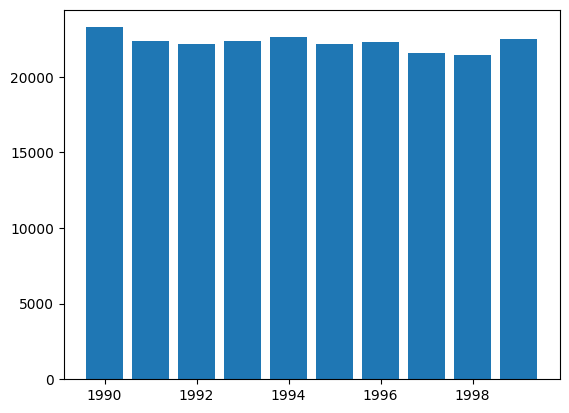

In [114]:
import matplotlib.pyplot as plt

plt.bar(count_flights_by_year_month.Year.compute(),count_flights_by_year_month.Flights.compute())
plt.show()

<ipython-input-116-93503d8ab000>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_years))


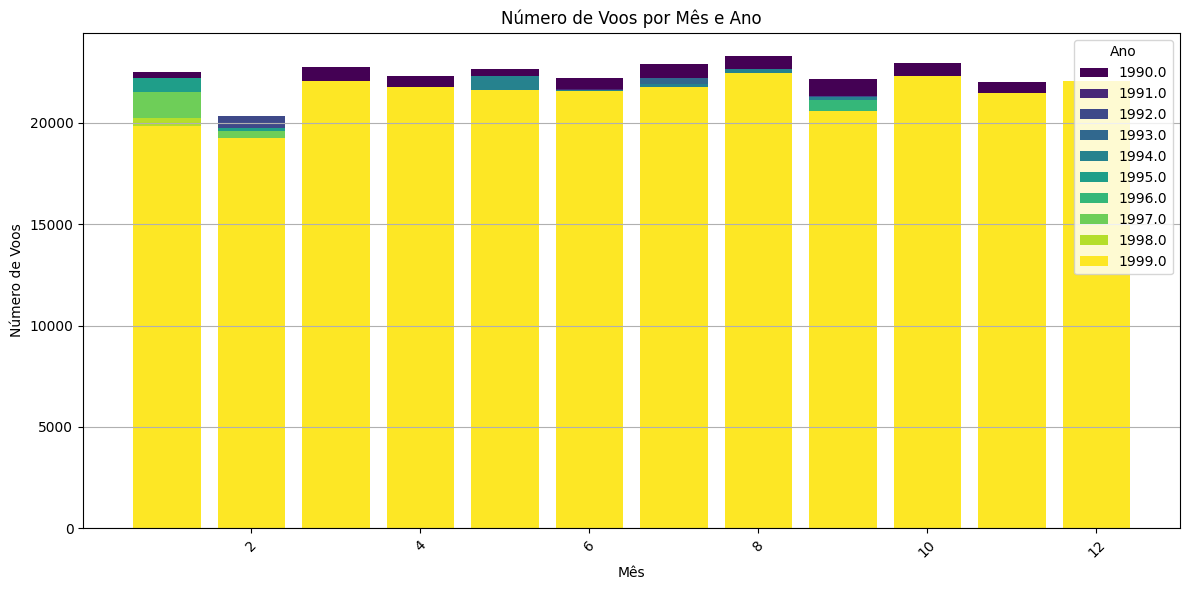

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Supomos que count_flights_by_year_month já foi definido anteriormente
months = count_flights_by_year_month.Month.compute()
flights = count_flights_by_year_month.Flights.compute()
years = count_flights_by_year_month.Year.compute()

# Criar um dicionário para mapear cores para cada ano
unique_years = np.unique(years)
colors = plt.cm.get_cmap('viridis', len(unique_years))

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))

# Criar as barras e colorir de acordo com o ano
for i, year in enumerate(unique_years):
    # Filtra os dados para o ano atual
    mask = years == year
    plt.bar(months[mask], flights[mask], color=colors(i), label=year)

# Adicionar detalhes ao gráfico
plt.title('Número de Voos por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Voos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()  # Ajusta o layout
plt.show()
